<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/4_Clasificacion/Clasificacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc("font", size=14)

# 1) Limitaciones de la Regresión Lineal

In [ ]:
lst1 = [*range(10, 30)]
lst2 = [0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1]

In [ ]:
print(lst1)
print(lst2)

In [ ]:
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['edad', 'compra'])
df.head()

In [ ]:
sns.scatterplot(data=df, x="edad", y="compra")

In [ ]:
X = df['edad'].values.reshape(-1, 1)
y = df['compra'].values.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg = reg.fit(X, y)

In [ ]:
df['compra_pred'] = reg.predict(X)
df.head()

In [ ]:
sns.regplot(data=df, x="edad", y="compra", ci=None)

In [ ]:
sns.regplot(data=df, x="edad", y="compra", logistic=True, ci=None)

# 2) Regresión Logística

In [3]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from pandas_profiling import ProfileReport

In [4]:
titanic = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/titanic_clase4.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preparación del dataset
Vamos a conservar solo algunas de las variables:

In [5]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

df = titanic[columns]
df.dropna(inplace = True) #eliminamos los registros con faltantes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


Vamos a usar la libreria **[Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling)** para realizar un breve análisis exploratorio del dataset.

In [ ]:
#pip install -U pandas-profiling

In [13]:
from pandas_profiling import ProfileReport

In [14]:
# Generate the Profiling Report
profile = ProfileReport(df)

In [15]:
# Or use the HTML report in an iframe
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Realizamos la transformación del **One-Hot-Encoder** para las variables categróricas. Recordamos no caer en la *trampa dummy*.

In [6]:
cat_vars = ['Sex', 'Pclass', 'Embarked']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var, drop_first=True) #el parametro drop_first elimina la posibilidad de caer en una trampa dummy
    df_1=df.join(cat_list)
    df=df_1

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,8.0500,S,1,0,1,0,1


In [7]:
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]
df_final=df[to_keep]

In [8]:
df_final.head()

,Survived,Age,SibSp,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,7.2500,1,0,1,0,1
1,1,38.0,1,71.2833,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,1
3,1,35.0,1,53.1000,0,0,0,0,1
4,0,35.0,0,8.0500,1,0,1,0,1


In [9]:
df = df_final

## Modelo

Vamos a sar el módulo [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) de sklearn

In [8]:
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
# Partición en train y test
y = df.loc[:, df.columns == 'Survived']
X = df.loc[:, df.columns != 'Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [23]:
# instancia del modelo
logisticRegr = LogisticRegression(max_iter=10000)

In [24]:
# entrenamiento
logisticRegr.fit(x_train, y_train)
#logisticRegr.fit(x_train, y_train, solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# performance
y_pred = logisticRegr.predict(x_test)
print('El accuracy de nuestra regresión logística en el set de test es: {:.2f}'.format(logisticRegr.score(x_test, y_test)))

El accuracy de nuestra regresión logística en el set de test es: 0.78


# 3) Interpretación

In [32]:
logisticRegr.coef_

array([[-0.04289953, -0.35183604,  0.00316298, -2.31314741, -0.87005746,
        -2.0658477 , -0.69300413, -0.62528627]])

In [33]:
logisticRegr.intercept_

array([4.05331877])

In [34]:
coeficientes= pd.DataFrame(logisticRegr.coef_[0], 
                X.columns, 
                columns=['coef'])
coeficientes

,coef
Age,-0.042900
SibSp,-0.351836
Fare,0.003163
Sex_male,-2.313147
Pclass_2,-0.870057
Pclass_3,-2.065848
Embarked_Q,-0.693004
Embarked_S,-0.625286


# 4) Métricas de evaluación



**Matriz de confusión**

Observación: la matriz de confsión de sklearn está espejada respecto a lo visto en la teoría:

                                tn fp
                                fn tp

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[74 11]
 [21 37]]


In [37]:
from sklearn.metrics import plot_confusion_matrix

[[74 11]
 [21 37]]


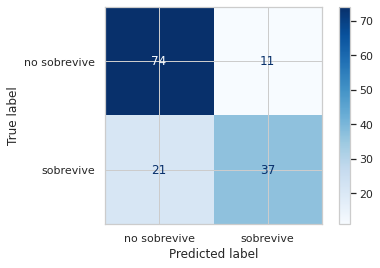

In [38]:
class_names = ['no sobrevive', 'sobrevive']

disp = plot_confusion_matrix(logisticRegr, x_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

print(disp.confusion_matrix)

**Precision, Recall y F-Score**

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [40]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.776224
Precision: 0.770833
Recall: 0.637931
F1 score: 0.698113


**ROC**

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [42]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])

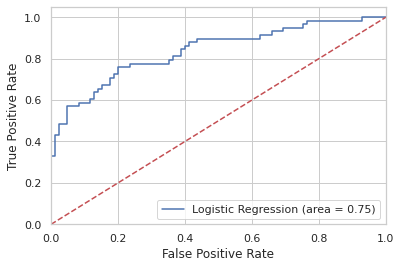

In [43]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Veamos que sucede si entrenamos un modelos con **menor cantidad de variables**

In [44]:
# Partición en train y test
y_2 = df.loc[:, df.columns == 'Survived']
X_2 = df.loc[:, ['Age', 'Embarked_Q', 'Embarked_S']]

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=99)

In [45]:
logisticRegr_2 = LogisticRegression(max_iter=10000)
logisticRegr_2.fit(x_train_2, y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred_2 = logisticRegr_2.predict(x_test_2)

Matriz de confusión

[[73 12]
 [45 13]]


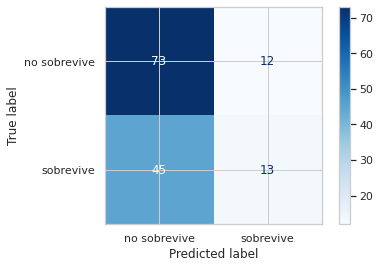

In [47]:
class_names = ['no sobrevive', 'sobrevive']

disp_2 = plot_confusion_matrix(logisticRegr_2, x_test_2, y_test_2,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

print(disp_2.confusion_matrix)

Métricas varias

In [48]:
# accuracy: (tp + tn) / (p + n)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print('Accuracy: %f' % accuracy_2)

# precision tp / (tp + fp)
precision_2 = precision_score(y_test_2, y_pred_2)
print('Precision: %f' % precision_2)

# recall: tp / (tp + fn)
recall_2 = recall_score(y_test_2, y_pred_2)
print('Recall: %f' % recall_2)

# f1: 2 tp / (2 tp + fp + fn)
f1_2 = f1_score(y_test_2, y_pred_2)
print('F1 score: %f' % f1_2)

Accuracy: 0.601399
Precision: 0.520000
Recall: 0.224138
F1 score: 0.313253


Curva ROC

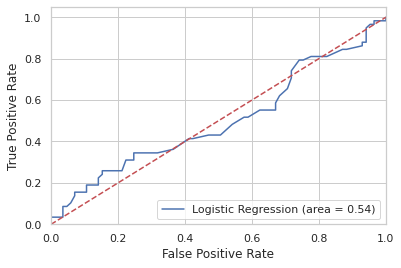

In [49]:
logit_roc_auc_2 = roc_auc_score(y_test_2, logisticRegr_2.predict(x_test_2))
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_2, logisticRegr_2.predict_proba(x_test_2)[:,1])

plt.figure()
plt.plot(fpr_2, tpr_2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Balanceo de clases

In [81]:
#pip install -U scikit-learn

In [9]:
df = df_final

In [11]:
df.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [12]:
df.Survived.value_counts()/df_final.Survived.count()*100

0    59.550562
1    40.449438
Name: Survived, dtype: float64

Veamos si balanceando nuestras clases podemos mejorar la performance de nuestro modelo.

## Subsampleo de clase mayoritaria

In [21]:
y = df.loc[:, df.columns == 'Survived']
X = df.loc[:, df.columns != 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [28]:
train = X_train
train['Survived'] = y_train.Survived.to_list()

positivos = train[train.Survived == 1]
print(len(positivos))
negativos = train[train.Survived == 0]
print(len(negativos))

230
339


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
negativos_sub = negativos.sample(n=len(positivos), random_state=99)
len(negativos_sub)

230

In [30]:
train_sub = pd.concat([positivos, negativos_sub])
len(train_sub)

460

In [32]:
y_train = train_sub.loc[:, train_sub.columns == 'Survived']
X_train = train_sub.loc[:, train_sub.columns != 'Survived']

In [35]:
# instancia del modelo
logisticRegr = LogisticRegression(max_iter=10000)

In [36]:
# entrenamiento
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = logisticRegr.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.762238
Precision: 0.706897
Recall: 0.706897
F1 score: 0.706897


## SMOTE

In [1]:
#pip install scikit-learn==0.22.1

In [10]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
y = df.loc[:, df.columns == 'Survived']
X = df.loc[:, df.columns != 'Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
print("length of oversampled data is ",len(os_data_X))
print("Number of 0 in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of 1",len(os_data_y[os_data_y['y']==1]))
print("Proportion of 0 data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  678
Number of 0 in oversampled data 339
Number of 1 339
Proportion of 0 data in oversampled data is  0.5
Proportion of 1 data in oversampled data is  0.5


In [16]:
# instancia del modelo
logisticRegr = LogisticRegression(max_iter=10000)

In [17]:
# entrenamiento
logisticRegr.fit(os_data_X, os_data_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = logisticRegr.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.776224
Precision: 0.716667
Recall: 0.741379
F1 score: 0.728814
